,answers,predicted,recall,precision
41,[],[],1.0,1.0
42,[],[],1.0,1.0
43,[],[],1.0,1.0
44,[],[],1.0,1.0
54,[],[],1.0,1.0
55,[],[],1.0,1.0
57,[],[],1.0,1.0
66,[],[],1.0,1.0
67,[],[],1.0,1.0
71,[],[],1.0,1.0


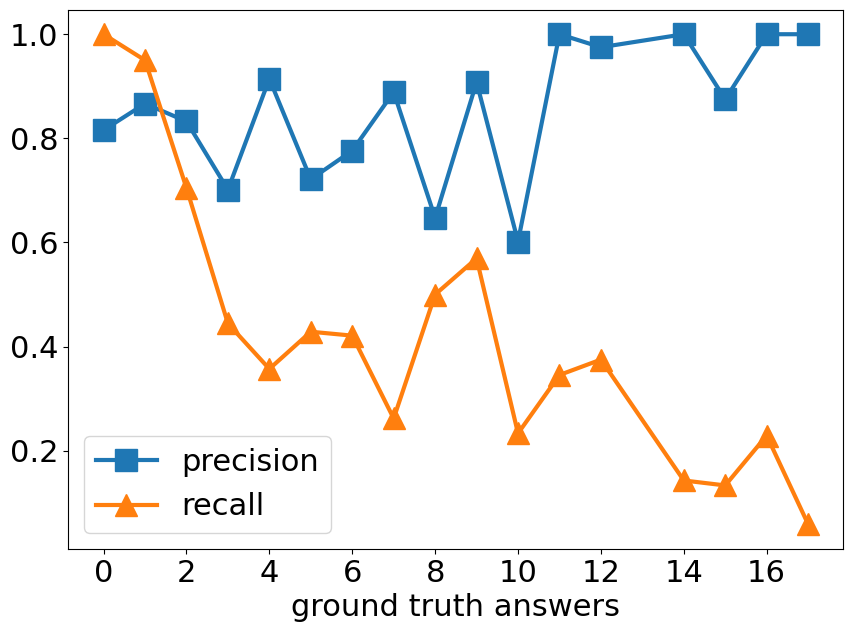

In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import os
from evaluate_answers import prepare_evaluation
from constants import MODELS, PROMPTS, RUNS, LLAMA3_70B, PROMPT_v4, GPT, MIXTRAL8x7B

plt.rcParams.update({'font.size': 22})

plt, axis = plt.subplots(figsize=(10, 7))
axis.set_title('')

predictions_path = f'../answers/{LLAMA3_70B}/v4_0/de/predicted.json'
dataset_path = f'../datasets/splits/de/dev_de.json'
predictions = json.load(open(predictions_path, 'r'))
questions = json.load(open(dataset_path, 'r'))
evaluation_df = prepare_evaluation(questions, predictions)

for model in [LLAMA3_70B]:
    for prompt in [PROMPT_v4]:
        prompt_run = f'{prompt}_0'
        for language in ['de']:
            predictions_path = f'../answers/{model}/{prompt_run}/{language}/predicted.json'
            dataset_path = f'../datasets/splits/{language}/dev_{language}.json'
            predictions = json.load(open(predictions_path, 'r'))
            questions = json.load(open(dataset_path, 'r'))
            evaluation_df = prepare_evaluation(questions, predictions)
            grouped_df = evaluation_df[evaluation_df.answer_count < 18].groupby(evaluation_df.answer_count)
            precisions = grouped_df.precision.mean().plot.line(ax=axis, marker='s', label='precision', markersize=16, linewidth=3)
            recalls = grouped_df.recall.mean().plot.line(ax=axis, marker='^', label='recall', markersize=16, linewidth=3)
            axis.set_xlabel('ground truth answers')
            axis.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
            axis.legend()
            # print(evaluation_df)
            plt.savefig('resources/precision_recall_answers.pdf', format='pdf')
                
evaluation_df = pd.DataFrame(evaluation_df, columns=['answers', 'predicted', 'recall', 'precision'])
evaluation_df[evaluation_df.answers.str.len() == 0]
